# Chapter 1: A Tour of Pandas

This chapter describes the two basic pandas constructs, the Series and the DataFrame. It shows how to load data from .csv files and gives an example of pulling data from online sources. This notebook will run through some of those ideas as an example and as practice.

In [1]:
%matplotlib inline
%load_ext version_information

# Standard Library

# Third Party Libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Local Libraries

# Local Definitions
plt.rcParams["font.size"] = 18

%version_information matplotlib,numpy,pandas

Software versions
Python 3.6.2 64bit [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 6.1.0
OS Darwin 16.7.0 x86_64 i386 64bit
matplotlib 2.0.2
numpy 1.13.1
pandas 0.20.3
Fri Oct 06 11:37:45 2017 MDT

## Reading .csv files (GOES edition)

First, we need some data. I'll use something real, because why not? The GOES satellites put out publicly available files in a .csv format, so that's convenient to use.

Data downloaded from https://satdat.ngdc.noaa.gov/sem/goes/data/new_full/

The file being used here is epead_p27e from GOES15 for 6 Jan 2014.

In [2]:
### Features highlighted from text
#     * parse_dates: reading the file directly results in the dates being
#           formatted as strings. It's useful to have them formatted as 
#           objects that are time-aware, and the parse_dates argument does
#           just that. It's capable of reading and interpreting a number of
#           different time/date formatting, and will likely work with no
#           issues.
#     * index_col: rather than having the default numerical index, life is
#           much easier if we index by the timestamp. This keyword specifies
#           which column in the csv to use as the index.
### New things not used in text
#     * skiprows: these data files have a large header. Trying to load the 
#           file automatically fails, so this keyword lets us force pandas
#           to skip the header information. This method really only works if
#           the data files are formatted uniformly.

data = pd.read_csv("data/g15_epead_p27e_32s_20140106_20140106.csv",skiprows=282,
                   parse_dates=['time_tag'],index_col=['time_tag'])
data.head()

,P2E_QUAL_FLAG,P2E_UNCOR_CR,P2E_UNCOR_FLUX,P3E_QUAL_FLAG,P3E_UNCOR_CR,P3E_UNCOR_FLUX,P4E_QUAL_FLAG,P4E_UNCOR_CR,P4E_UNCOR_FLUX,P5E_QUAL_FLAG,P5E_UNCOR_CR,P5E_UNCOR_FLUX,P6E_QUAL_FLAG,P6E_UNCOR_CR,P6E_UNCOR_FLUX,P7E_QUAL_FLAG,P7E_UNCOR_CR,P7E_UNCOR_FLUX
time_tag,,,,,,,,,,,,,,,,,,
2014-01-06 00:00:21.183,0,0.091463,0.36295,0,0.030488,0.093809,0,0.060976,0.013141,0,0.213420,0.013769,0,0.33537,0.003726,0,0.45732,0.001524
2014-01-06 00:00:53.953,0,0.060976,0.24197,0,0.030488,0.093809,0,0.182930,0.039424,0,0.060976,0.003934,0,0.33537,0.003726,0,0.64024,0.002134
2014-01-06 00:01:26.720,0,0.091463,0.36295,0,0.000000,0.000000,0,0.121950,0.026283,0,0.243900,0.015736,0,0.48780,0.005420,0,0.48780,0.001626
2014-01-06 00:01:59.487,0,0.030488,0.12098,0,0.000000,0.000000,0,0.091463,0.019712,0,0.091463,0.005901,0,0.33537,0.003726,0,0.48780,0.001626
2014-01-06 00:02:32.257,0,0.060976,0.24197,0,0.000000,0.000000,0,0.121950,0.026283,0,0.060976,0.003934,0,0.45732,0.005081,0,0.60976,0.002033


There are 6 channels in this file, corresponding to 6 different proton energies in the Eastward looking direction. The energies are specified in Section 5 of the GOES Databook.

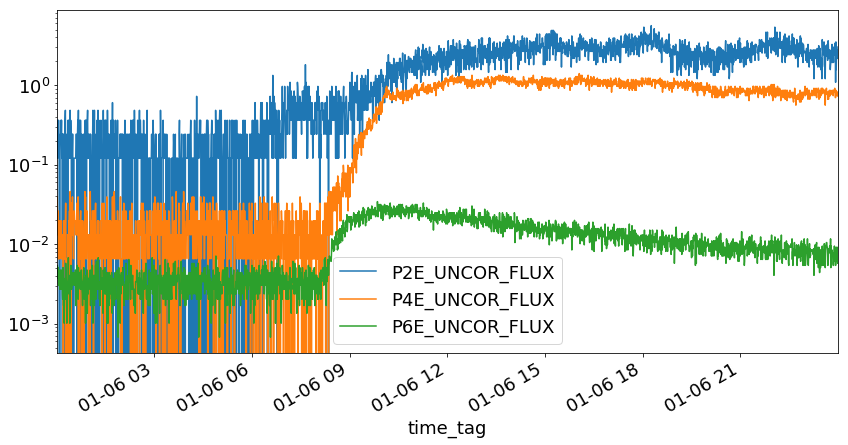

In [3]:
data.plot(y=['P2E_UNCOR_FLUX','P4E_UNCOR_FLUX','P6E_UNCOR_FLUX'],logy=True,
          figsize=(14,7));

## Joining two data files together

Just for fun, let's load up the data from 4 Jan 2014 to 15 Jan 2014 (covering the entire event) and see if we can merge them into a single DataFrame.

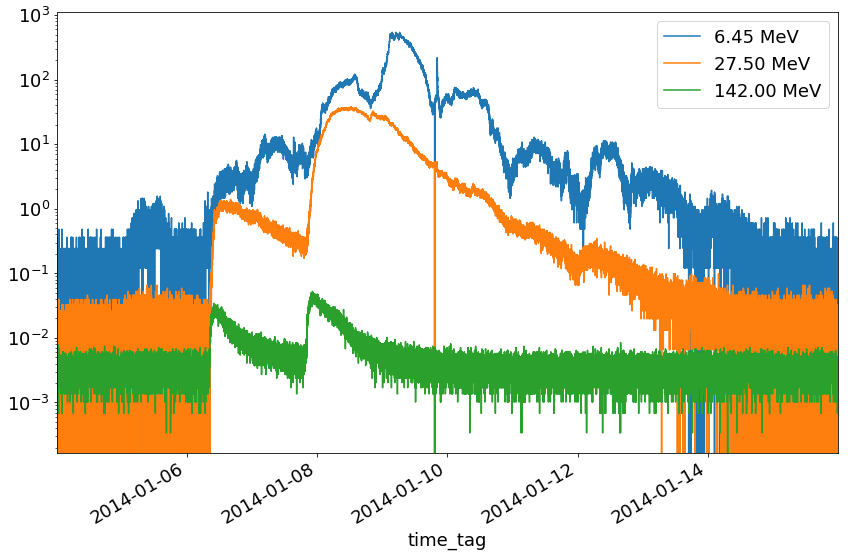

In [4]:
### Merging DataFrames
#   Since these files are formatted identically, merging them is actually
#   trivial! Just use the DataFrame().append() method; this does not modify
#   the original DataFrame, so it's saved to a new one.
data = pd.read_csv("data/g15_epead_p27e_32s_20140104_20140104.csv",skiprows=282,
                   parse_dates=['time_tag'],index_col=['time_tag'])
for i in range(5,16):
    add_data = pd.read_csv("data/g15_epead_p27e_32s_201401{0:02d}_201401{0:02d}.csv".format(i),
                           skiprows=282,parse_dates=['time_tag'],index_col=['time_tag'])
    data = data.append(add_data)
    
Emin = pd.Series([0.74,4.2,8.7,15,38,84,110])
Emax = pd.Series([4.2,8.7,14.5,40,82,200,900])
Ectr = (Emin+Emax)/2.

data.plot(y=['P2E_UNCOR_FLUX','P4E_UNCOR_FLUX','P6E_UNCOR_FLUX'],logy=True,
          figsize=(14,9))
plt.legend(["{0:.2f} MeV".format(Ectr[1]),"{0:.2f} MeV".format(Ectr[3]),"{0:.2f} MeV".format(Ectr[5])]);

## Reading data from online sources

The text is out of date; the DataReader class is no longer in pandas.io, but is rather now in a separate module entirely. Below shows the correct way to do the book's example with this module.

The DataReader class is limited in the online sources it can use, and seems to be restricted entirely to financial market databases. Too bad; it'd be very useful if it could handle commonly used space data sources like GOES.

In [5]:
from pandas_datareader.data import DataReader
from datetime import date
from dateutil.relativedelta import relativedelta

In [6]:
lmt = DataReader("NYSE:LMT", "google", date.today()+relativedelta(months=-3))
lmt.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2017-09-29,308.95,310.36,308.69,310.29,911489
2017-10-02,310.79,311.38,309.27,311.33,1007846
2017-10-03,311.38,314.02,311.30,312.86,803332
2017-10-04,313.28,314.10,312.46,313.02,903777
2017-10-05,312.82,315.28,312.64,314.58,950398


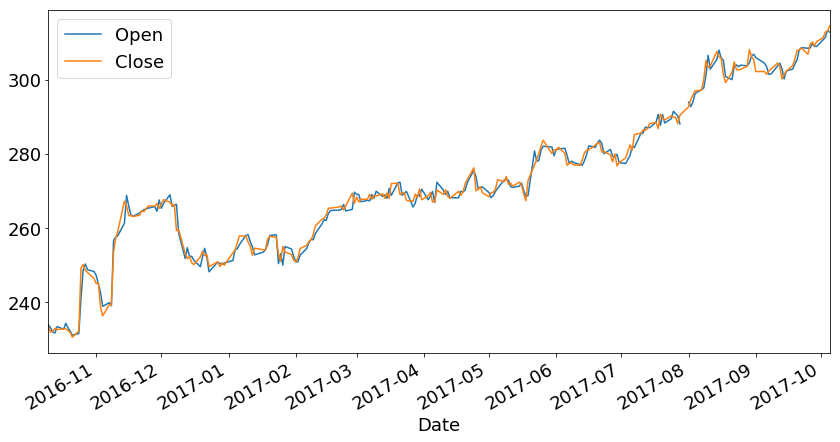

In [7]:
lmt.plot(y=['Open','Close'],figsize=(14,7))

Well, it gives me a year of data no matter what. Not sure why that is. But this demos the way to use it, so I'll call it good. Since it's only for finance, there's not much point in belaboring this one.